<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.nus.edu.sg/images/default-source/base/logo.png' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Machine Learning in Python</h1><h2>Group Project </h2><h3>(8 Students per Group)</h3></th>
    </tr>
</table>

## Objectives
##### After completing this assignment, you should be able to:
1. Build Machine Learning Models to solve classification and regression problems
2. Extract and collect data online, clean and prepare the data, explore and understand the data.
2. Select, Train and Evaluate the machine learning models
3. Fine-tuning model hyperparameters using grid search or other suitable methods
4. Use the model to make predictions

## Datasets
Extract and collect data online to solve two problems:

1. Classification Problem
2. Regression Problem

#### Popular sources for machine learning datasets:

https://www.kaggle.com/datasets

https://archive.ics.uci.edu/ml/index.php

https://registry.opendata.aws/

https://datasetsearch.research.google.com/

https://msropendata.com/


## Instructions

The below template only provides you a basic structure for you to solve the problem. Feel free to **add in more cells** and include more steps where necessary to achieve the goal of the project.

## 1. Classification Problem:

### Step 1: Import Data and Perform Data Preparation & Exploration
Remember to split data into train data and test data

In [ ]:
# Enter your code here:
# Import the requried packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model, neighbors, tree, svm, ensemble,neural_network
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [ ]:
# Enter your code here:
# Loading the data
health = pd.read_csv('Maternal Health Risk Data Set.csv')
print(health.head())

y = health['RiskLevel']
X = health.drop(['RiskLevel'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

X_train

In [ ]:
health.describe()

In [ ]:
health.head()

In [ ]:
X_train.shape

### Step 2: Select, Train, Evaluate and Fine Tuning the Models
Please shortlist two to five promissing models, provide details on how you fine-tuning the model hyperparameters (e.g. using Grid Saerch, Random Search and etc.). Feel free to add in more cells. 

1.KNN

In [ ]:
# Model 1
# Enter your code here:
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
print('train_acc:', knn_clf.score(X_train, y_train),
      '\n test_acc:', knn_clf.score(X_test, y_test))


In [ ]:
knn_clf.predict(X_test)

In [ ]:
# Tuning the n_neighbors
# find the best n_neighbors
n_range = range(1,30,2)
train_acc = []
test_acc = []
for n_neighbor in n_range:
      knn_n_clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbor)
      knn_n_clf.fit(X_train,y_train)
      train_acc.append(knn_n_clf.score(X_train,y_train))
      test_acc.append(knn_n_clf.score(X_test,y_test))

# pic
plt.plot(n_range,train_acc,'bo-',label='train acc')
plt.plot(n_range,test_acc,'ro-',label='test acc')
plt.xlabel('n_range',fontsize='x-large')
plt.ylabel('acc',fontsize='x-large')
plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [ ]:
idx = np.argmin(abs(np.array(train_acc)-np.array(test_acc)))
idx

In [ ]:
# the best knn model
knn_clf_final = neighbors.KNeighborsClassifier(n_neighbors=12)
knn_clf_final.fit(X_train, y_train)
print('train_acc:', knn_clf_final.score(X_train, y_train),
      '\n test_acc:', knn_clf_final.score(X_test, y_test))

In [ ]:
Decision Tree

In [ ]:
# Model 2
# Enter your code here:
dt_clf = tree.DecisionTreeClassifier(max_depth = 3)
dt_clf.fit(X_train, y_train)
print('train_acc:', dt_clf.score(X_train, y_train),
      '\n test_acc:', dt_clf.score(X_test, y_test))

In [ ]:
# Tuning Multiple Model Hyperparameters using GridSearchCV
dt_clf = tree.DecisionTreeClassifier()

param_grid = { "criterion" : ["gini", "entropy"],
              "min_samples_leaf" : [1, 5, 10],
              "min_samples_split" : [10, 12, 16, 20,24],
              'max_depth' : [5,6,7,8,9,10,11]
             }

gs_clf = GridSearchCV(dt_clf, param_grid=param_grid, scoring='accuracy', cv= 5, n_jobs=-1)

gs_clf.fit(X_train, y_train)
print(gs_clf.best_score_)
print(gs_clf.best_params_)
print(gs_clf.best_estimator_)

In [ ]:
#dt_clf_final = tree.DecisionTreeClassifier()
dt_clf = gs_clf.best_estimator_
dt_clf.fit(X_train,y_train)

print('train_acc:', dt_clf.score(X_train, y_train),
      '\n test_acc:', dt_clf.score(X_test, y_test))

In [ ]:
#dt_clf_final = tree.DecisionTreeClassifier()
dt_clf_final = tree.DecisionTreeClassifier(criterion='entropy',
                                           max_depth=10,
                                           min_samples_leaf=1,
                                           min_samples_split=10)
dt_clf_final.fit(X_train,y_train)

print('train_acc:', dt_clf_final.score(X_train, y_train),
      '\n test_acc:', dt_clf_final.score(X_test, y_test))

In [ ]:
dt_clf_final.predict(X_test)

In [ ]:
Netural Network

In [ ]:
# Model 3 
# Enter your code here:
# Create the mlp model
mlp_clf = neural_network.MLPClassifier(hidden_layer_sizes=(10,),
                    max_iter= 2000, solver = 'lbfgs')

mlp_clf.fit(X_train,y_train)
print(mlp_clf.coefs_) # connection weights
print(mlp_clf.intercepts_) # bias

In [ ]:
print('train_acc:', mlp_clf.score(X_train, y_train),
      '\n test_acc:', mlp_clf.score(X_test, y_test))

In [ ]:
# use gridsearchcv
mlp_clf = neural_network.MLPClassifier()

param_grid = {
                "hidden_layer_sizes":[5,10,15,20,24,26,28,30,32,36,48,56,64,72],
                "solver": ['lbfgs'],
                "max_iter":[2000,3000,4000,5000,6000]
             }

gs_clf = GridSearchCV(mlp_clf, param_grid=param_grid, scoring='accuracy', cv= 5, n_jobs=-1)

gs_clf.fit(X_train, y_train)
print(gs_clf.best_score_)
print(gs_clf.best_params_)
print(gs_clf.best_estimator_)

In [ ]:
mlp_clf = gs_clf.best_estimator_
mlp_clf.fit(X_train,y_train)
print('train_acc:', mlp_clf.score(X_train, y_train),
      '\n test_acc:', mlp_clf.score(X_test, y_test))

In [ ]:
mlp_clf_final = neural_network.MLPClassifier(
    hidden_layer_sizes=64,
    max_iter=3000,
    solver='lbfgs'
)
mlp_clf_final.fit(X_train,y_train)
print('train_acc:', mlp_clf_final.score(X_train, y_train),
      '\n test_acc:', mlp_clf_final.score(X_test, y_test))

In [ ]:
mlp_clf_final.predict(X_test)

In [ ]:
4.Random Forest Model

In [ ]:
# Model 4 (optional)
# Enter your code here:
#Random Forest Model
rf_clf = ensemble.RandomForestClassifier(n_estimators =30, 
                                         criterion ='gini', 
                                         max_depth = 10, 
                                         max_features ='auto') # a random subset of features, if set as 'auto': max_features=sqrt(n_features)
                                                                       
rf_clf.fit(X_train, y_train)
print('train_acc:', rf_clf.score(X_train, y_train), 
      '\n test_acc:', rf_clf.score(X_test, y_test))

In [ ]:
#n_estimators
n_range = range(1,200, 10)
train_accuracy = []
test_accuracy = []

for n in n_range:
    rf_clf = ensemble.RandomForestClassifier(n_estimators =n, 
                                             criterion ='gini', 
                                             max_depth = 10, 
                                             max_features =4)
    rf_clf.fit(X_train, y_train) 
    train_accuracy.append(rf_clf.score(X_train, y_train))
    test_accuracy.append(rf_clf.score(X_test, y_test))
print('train_acc:', rf_clf.score(X_train, y_train), 
      '\n test_acc:', rf_clf.score(X_test, y_test))  
print(n)
#Plot the train & test accuracy
plt.plot(n_range, train_accuracy, 'bo-', label ='training accuracy')
plt.plot(n_range, test_accuracy, 'ro-', label = 'testing accuracy')

plt.xlabel('n_estimators', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [ ]:
#max_depth
depth_range = range(1,20)
train_accuracy = []
test_accuracy = []

for d in depth_range:
    rf_clf = ensemble.RandomForestClassifier(n_estimators =191, 
                                             criterion ='gini', 
                                             max_depth = d, 
                                             max_features = 4)
    rf_clf.fit(X_train, y_train)   
    train_accuracy.append(rf_clf.score(X_train, y_train))
    test_accuracy.append(rf_clf.score(X_test, y_test))
print('train_acc:', rf_clf.score(X_train, y_train), 
      '\n test_acc:', rf_clf.score(X_test, y_test))
print(d)
#Plot the train & test accuracy
plt.plot(depth_range, train_accuracy, 'bo-', label ='training accuracy')
plt.plot(depth_range, test_accuracy, 'ro-', label = 'testing accuracy')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [ ]:
#max_features
f_range = range(1,7)
train_accuracy = []
test_accuracy = []

for f in f_range:
    rf_clf = ensemble.RandomForestClassifier(n_estimators =191, 
                                             criterion ='gini', 
                                             max_depth = 19, 
                                             max_features =f)
    rf_clf.fit(X_train, y_train) 
    train_accuracy.append(rf_clf.score(X_train, y_train))
    test_accuracy.append(rf_clf.score(X_test, y_test))
print('train_acc:', rf_clf.score(X_train, y_train), 
      '\n test_acc:', rf_clf.score(X_test, y_test))  
print(f)
#Plot the train & test accuracy
plt.plot(f_range, train_accuracy, 'bo-', label ='training accuracy')
plt.plot(f_range, test_accuracy, 'ro-', label = 'testing accuracy')

plt.xlabel('max_features', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [ ]:
rf_clf = ensemble.RandomForestClassifier(n_estimators =191, 
                                     criterion ='entropy', 
                                     max_depth = 19, 
                                     max_features =6)
rf_clf.fit(X_train, y_train) 
    
print('train_acc:', rf_clf.score(X_train, y_train), 
      '\n test_acc:', rf_clf.score(X_test, y_test))

In [ ]:
rf_clf_final = ensemble.RandomForestClassifier(n_estimators =191,
                                     criterion ='entropy',
                                     max_depth = 19,
                                     max_features =6)
rf_clf_final.fit(X_train, y_train)

print('train_acc:', rf_clf_final.score(X_train, y_train),
      '\n test_acc:', rf_clf_final.score(X_test, y_test))

### Step 3: Recommend the Best Model and Explain the Reasons

Explain your answer here:



In [ ]:
Explain your answer here:

In terms of accuracy, random forest works best，
Accuracy on the training set reaches:0.9235511713933415
Accuracy on the test set reaches:0.8916256157635468
There is not much difference in the accuracy of the training set and the test set, which is within an acceptable range

In [ ]:
# Enter your code here (if required):

# Enter your code here (if required):
train_acc_list = [knn_clf_final.score(X_train,y_train),
                  dt_clf_final.score(X_train,y_train),
                  mlp_clf_final.score(X_train,y_train),
                  rf_clf_final.score(X_train,y_train)
                  ]
test_acc_list = [   knn_clf_final.score(X_test,y_test),
                    dt_clf_final.score(X_test,y_test),
                    mlp_clf_final.score(X_test,y_test),
                    rf_clf_final.score(X_test,y_test)
                 ]
label = [ 'KNN', 'Decision Tree', 'Neural Network','Random Forest']
acc = pd.DataFrame({'train_acc': train_acc_list,
                   'test_acc': test_acc_list}, index=label)
acc.plot.bar(rot=0, ylim=[0.5, 1], title ='Train & Test Accuracy for different models')


### Step 4: Use the best model to make prediction
Make prediction on the test data and provide the error analysis on the results (e.g. confusion matrix, precision & recall and etc.)


In [ ]:
Confusion Matrix

In [ ]:
y_test_pred = rf_clf_final.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_test_pred)
cf_matrix

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')
ax.title.set_text("Confusion Matrix")
ax.set_xlabel("y_pred")
ax.set_ylabel("y_true")
plt.savefig("./Health_Risk_cf_matrix.png")
plt.show()

In [ ]:
# Enter your code here:

# report
print(classification_report(y_test,y_test_pred))


In [ ]:
PR Curve

In [ ]:
y_test

In [ ]:
from sklearn.preprocessing import label_binarize, LabelBinarizer

Y_test = label_binarize(y_test, classes=['low risk','mid risk','high risk'])
n_classes = Y_test.shape[1]
Y_train = label_binarize(y_train,classes=['low risk','mid risk','high risk'])
Y_test

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
rf = OneVsRestClassifier(ensemble.RandomForestClassifier(n_estimators =191,
                                     criterion ='entropy',
                                     max_depth = 19,
                                     max_features =6))
clf = rf.fit(X_train, Y_train)
y_score = clf.predict_proba(X_test)
y_score

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# (1) For each class
precision = dict()
recall = dict()
average_precision = dict()
# np.seterr(divide='ignore',invalid='ignore')

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])

    average_precision[i] = average_precision_score(Y_test[:, i],
                                                   y_score[:, i])


# (2) A "macro-average": quantifying score on all classes jointly
precision["macro"], recall["macro"], _ = precision_recall_curve(Y_test.ravel(),
                                                                y_score.ravel())

average_precision["macro"] = average_precision_score(Y_test, y_score,
                                                     average="macro")

print('Average precision score, macro-averaged over all classes: {0:0.2f}'.format(average_precision["macro"]))

In [ ]:
y_test

In [ ]:
# plt.figure()
plt.step(recall['macro'], precision['macro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, macro-averaged over all classes: AP={0:0.3f}'
        .format(average_precision["macro"]))
plt.show()

In [ ]:
ROC 曲线

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 1
colors = ['blue', 'red', 'green', 'black', 'yellow']
class_label = ['low risk','mid risk','high risk']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.3f})'
             ''.format(class_label[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

### Step 5: Save the Best Model for Future Use

In [ ]:
# Enter your code here:

# Enter your code here:
# Save the best model
import joblib
joblib.dump(rf_clf_final, "best_clf_rf.pkl")

## 2. Regression Problem

### Step 1: Import Data and Perform Data Preparation & Exploration

In [83]:
# Enter your code here:

In [1]:
# Import the requried packages
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model, neighbors, tree, svm, ensemble, neural_network
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate

import warnings

warnings.filterwarnings('ignore')

In [21]:
house = pd.read_csv('./MELBOURNE_HOUSE_PRICES_LESS.csv', encoding='utf-8')
house

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [3]:
dd = house[['Rooms', 'Type', 'Postcode', 'Propertycount', 'Distance', 'Price']]
dd

,Rooms,Type,Postcode,Propertycount,Distance,Price
0,3,h,3067,4019,3.0,1490000.0
1,3,h,3067,4019,3.0,1220000.0
2,3,h,3067,4019,3.0,1420000.0
3,3,h,3040,1543,7.5,1515000.0
4,2,h,3042,3464,10.4,670000.0
...,...,...,...,...,...,...
63018,3,h,3064,5833,20.6,566000.0
63019,3,h,3064,5833,20.6,500000.0
63020,3,h,3064,5833,20.6,545000.0
63021,3,u,3074,7955,15.3,NaN


In [4]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          63023 non-null  int64  
 1   Type           63023 non-null  object 
 2   Postcode       63023 non-null  int64  
 3   Propertycount  63023 non-null  int64  
 4   Distance       63023 non-null  float64
 5   Price          48433 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 2.9+ MB


In [5]:
dd['Type'].value_counts()

h    45053
u    11655
t     6315
Name: Type, dtype: int64

In [6]:
dd['Type'] = dd['Type'].map( {'h': 1, 'u': 2, 't' :3} ).astype(int)
dd.head()

,Rooms,Type,Postcode,Propertycount,Distance,Price
0,3,1,3067,4019,3.0,1490000.0
1,3,1,3067,4019,3.0,1220000.0
2,3,1,3067,4019,3.0,1420000.0
3,3,1,3040,1543,7.5,1515000.0
4,2,1,3042,3464,10.4,670000.0


In [7]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          63023 non-null  int64  
 1   Type           63023 non-null  int32  
 2   Postcode       63023 non-null  int64  
 3   Propertycount  63023 non-null  int64  
 4   Distance       63023 non-null  float64
 5   Price          48433 non-null  float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 2.6 MB


In [8]:
dd.isnull().sum()

Rooms                0
Type                 0
Postcode             0
Propertycount        0
Distance             0
Price            14590
dtype: int64

In [9]:
dd = dd.dropna(axis=0,subset = ['Price'])
dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48433 entries, 0 to 63020
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          48433 non-null  int64  
 1   Type           48433 non-null  int32  
 2   Postcode       48433 non-null  int64  
 3   Propertycount  48433 non-null  int64  
 4   Distance       48433 non-null  float64
 5   Price          48433 non-null  float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 2.4 MB


In [10]:
dd.isnull().sum()

Rooms            0
Type             0
Postcode         0
Propertycount    0
Distance         0
Price            0
dtype: int64

In [11]:
dd.describe()

,Rooms,Type,Postcode,Propertycount,Distance,Price
count,48433.000000,48433.000000,48433.000000,48433.000000,48433.000000,4.843300e+04
mean,3.071666,1.397498,3123.210332,7566.399913,12.702761,9.978982e+05
std,0.944708,0.667194,125.534940,4457.405884,7.550030,5.934989e+05
min,1.000000,1.000000,3000.000000,39.000000,0.000000,8.500000e+04
25%,2.000000,1.000000,3051.000000,4280.000000,7.000000,6.200000e+05
50%,3.000000,1.000000,3103.000000,6567.000000,11.700000,8.300000e+05
75%,4.000000,2.000000,3163.000000,10412.000000,16.700000,1.220000e+06
max,31.000000,3.000000,3980.000000,21650.000000,55.800000,1.120000e+07


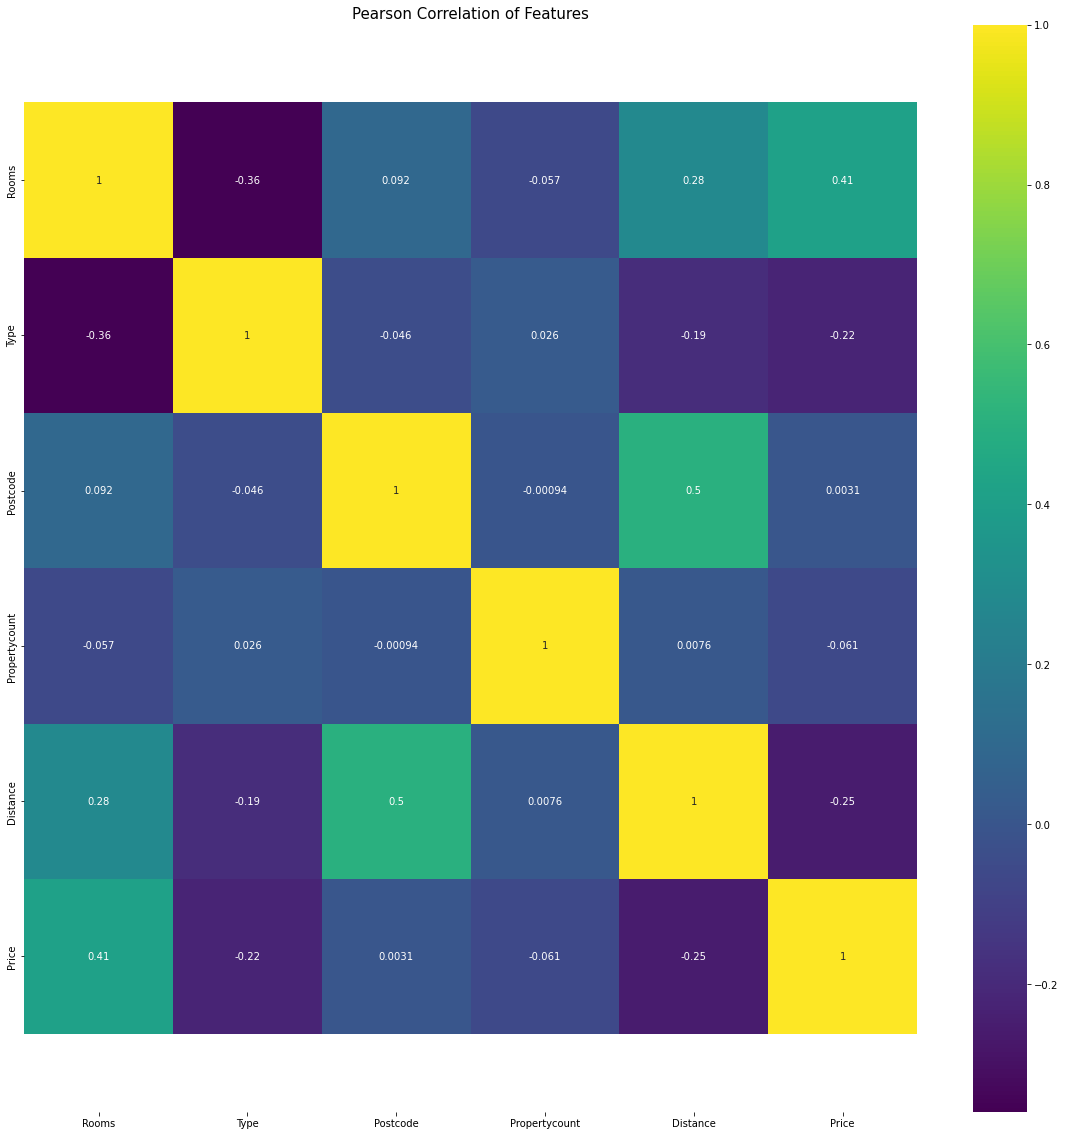

In [12]:
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(dd.corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [13]:
X = dd[['Rooms', 'Type', 'Postcode', 'Propertycount', 'Distance']]
y = dd['Price']

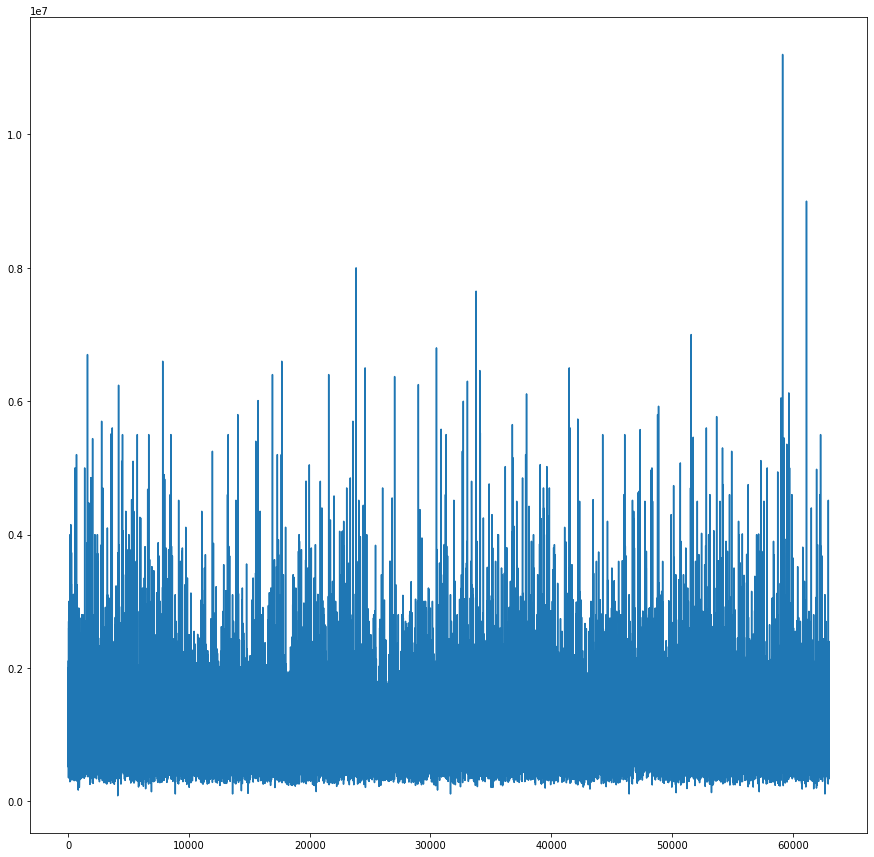

In [14]:
plt.figure(figsize=(15,15))
plt.plot(y)

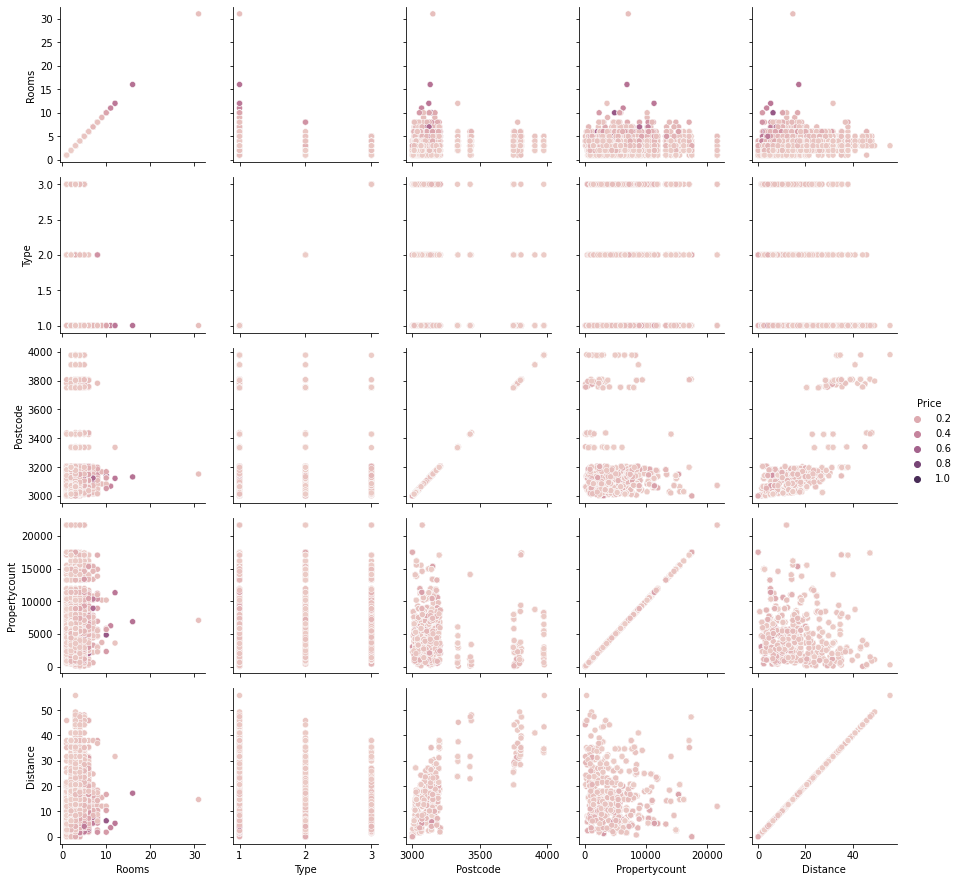

In [15]:
g = sns.PairGrid(data=dd, hue= 'Price', height=2.5)
g = g.map(sns.scatterplot)
g = g.add_legend()
# plt.savefig("Price correlation.png",dpi=400)

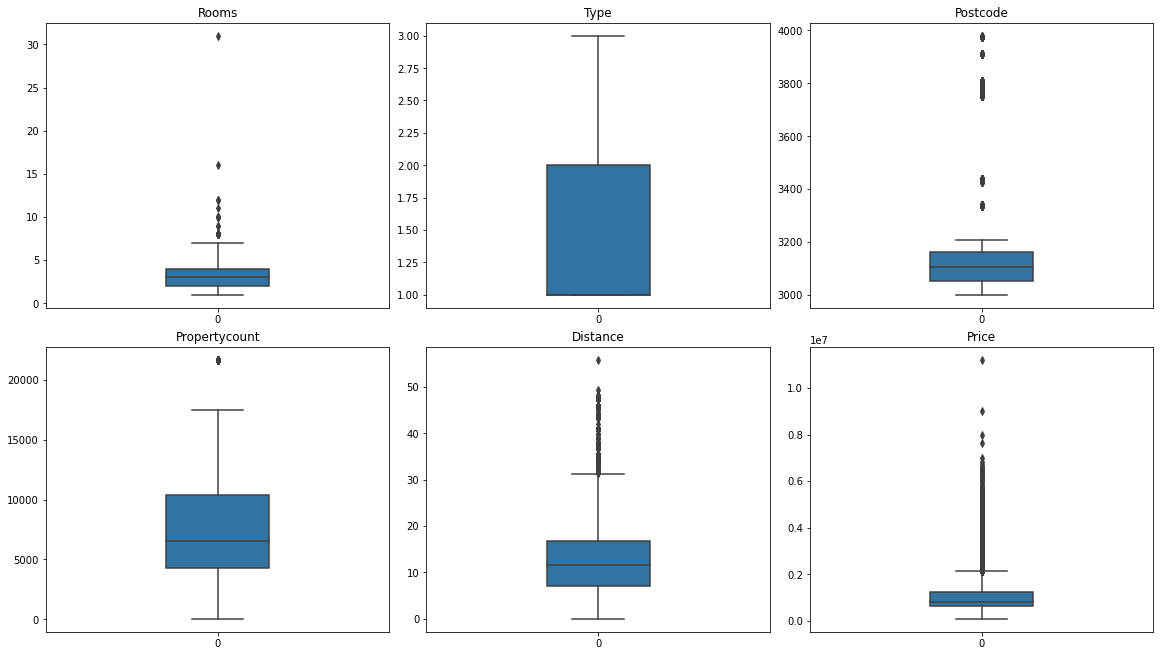

In [16]:
fig, ax =plt.subplots(2,3,constrained_layout=True, figsize=(16, 9))
axesSub = sns.boxplot(data=dd['Rooms'], ax=ax[0][0], width=0.3)
axesSub.set_title('Rooms')
axesSub = sns.boxplot(data=dd['Type'], ax=ax[0][1], width=0.3)
axesSub.set_title('Type')
axesSub = sns.boxplot(data=dd['Postcode'], ax=ax[0][2], width=0.3)
axesSub.set_title('Postcode')
axesSub = sns.boxplot(data=dd['Propertycount'], ax=ax[1][0], width=0.3)
axesSub.set_title('Propertycount')
axesSub = sns.boxplot(data=dd['Distance'], ax=ax[1][1], width=0.3)
axesSub.set_title('Distance')
axesSub = sns.boxplot(data=dd['Price'], ax=ax[1][2], width=0.3)
_ = axesSub.set_title('Price')

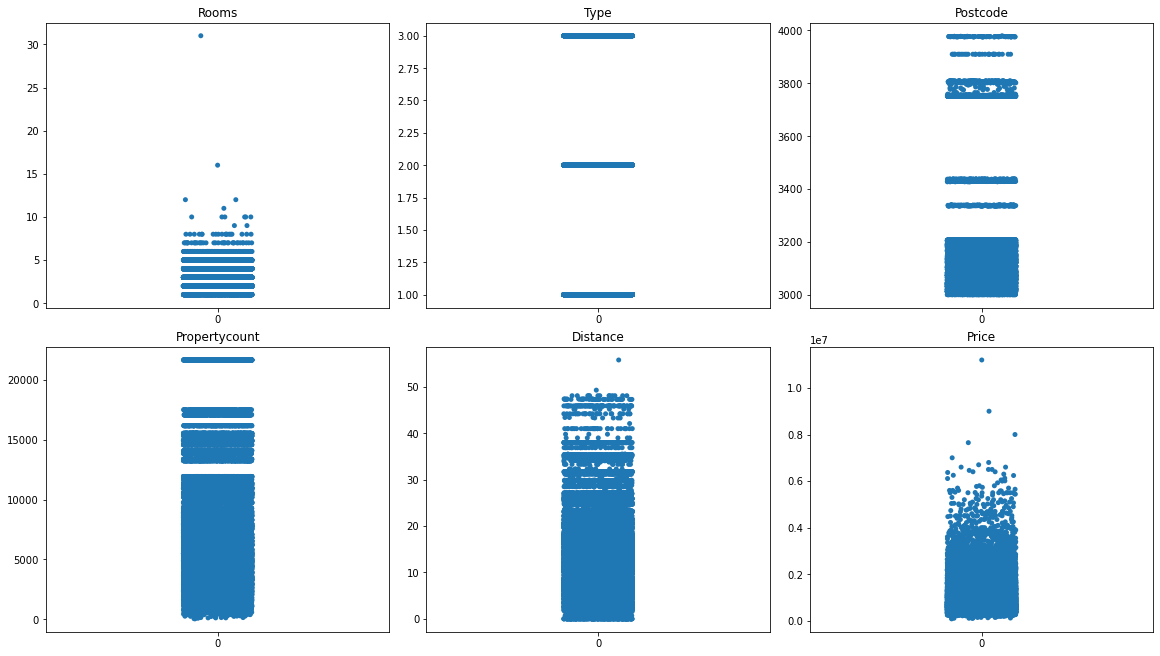

In [17]:
fig, ax =plt.subplots(2,3,constrained_layout=True, figsize=(16, 9))
axesSub = sns.stripplot(data=dd['Rooms'], ax=ax[0][0])
axesSub.set_title('Rooms')
axesSub = sns.stripplot(data=dd['Type'], ax=ax[0][1])
axesSub.set_title('Type')
axesSub = sns.stripplot(data=dd['Postcode'], ax=ax[0][2])
axesSub.set_title('Postcode')
axesSub = sns.stripplot(data=dd['Propertycount'], ax=ax[1][0])
axesSub.set_title('Propertycount')
axesSub = sns.stripplot(data=dd['Distance'], ax=ax[1][1])
axesSub.set_title('Distance')
axesSub = sns.stripplot(data=dd['Price'], ax=ax[1][2])
_ = axesSub.set_title('Price')

Text(0.5, 1.0, 'Price')

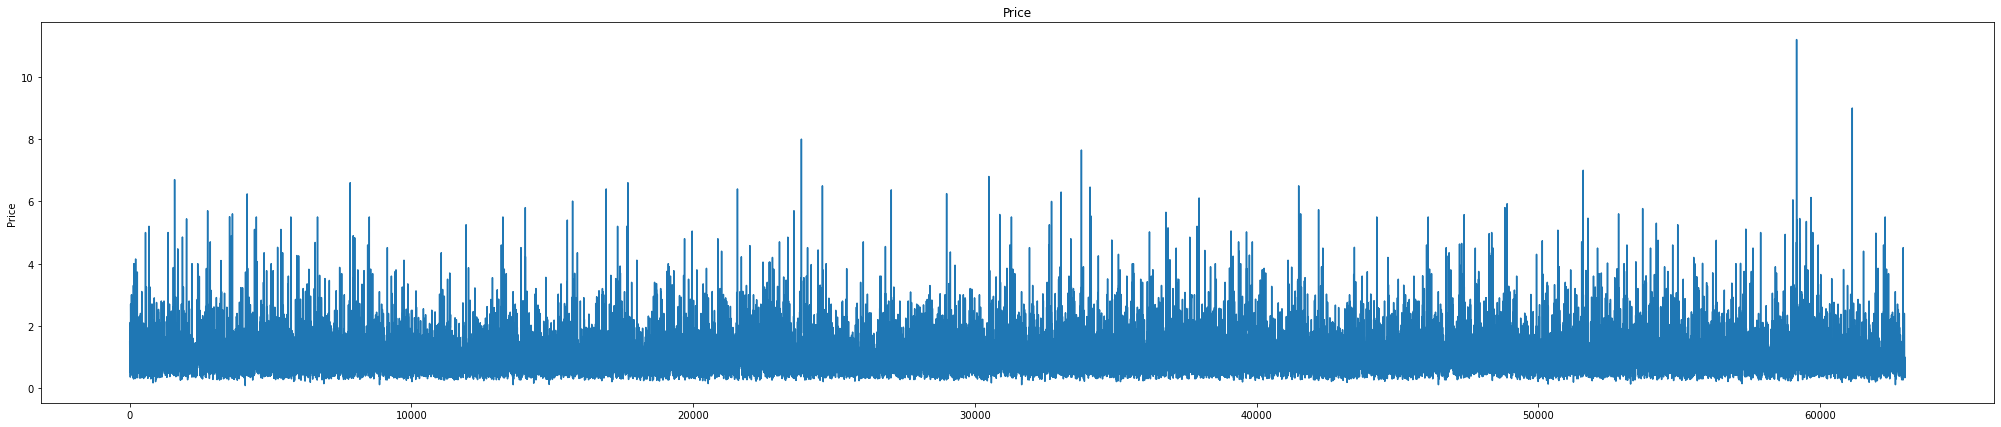

In [15]:
plt.figure(figsize=(35, 7))
ax = sns.lineplot(data=dd['Price'] / 1e6)
ax.set_title('Price')
# plt.savefig("Lineplot(Price).png",dpi=400)

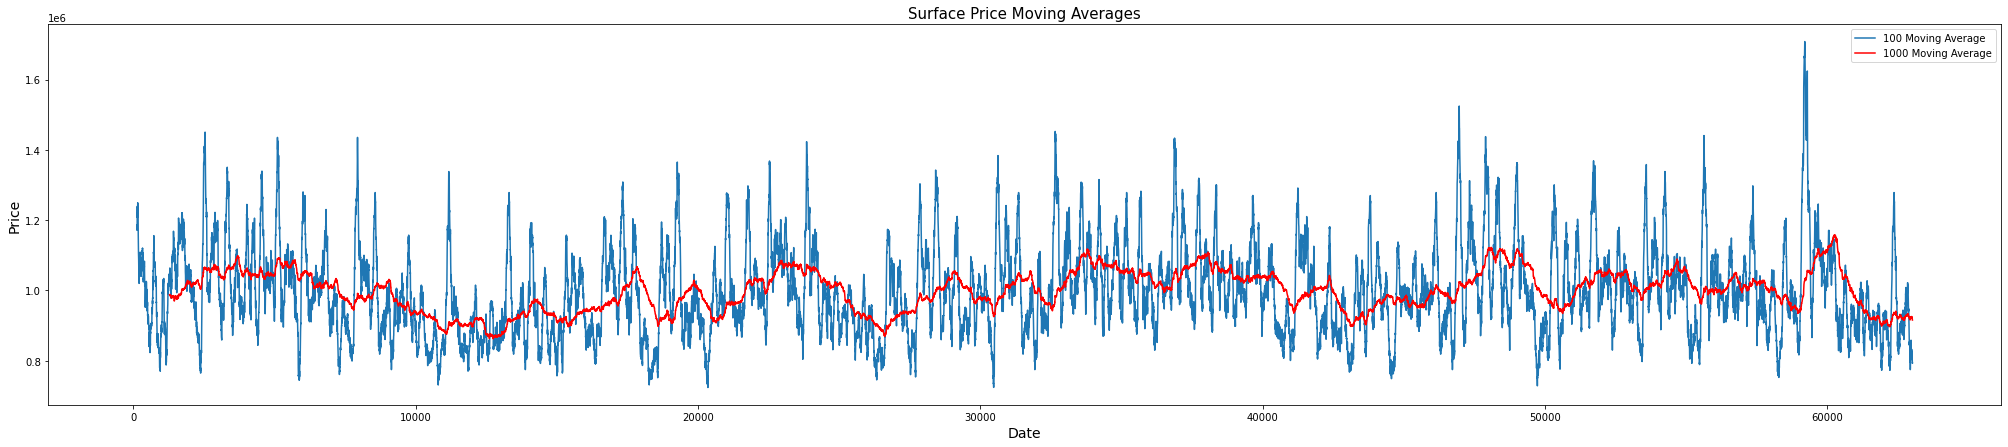

In [69]:
yearly = dd['Price'].rolling(window = 100).mean()
tenyearly = dd['Price'].rolling(window = 1000).mean()
MAax = yearly.plot(figsize = (35, 7), label = '100 Moving Average')
tenyearly.plot(ax = MAax, color = 'red', label = '1000 Moving Average')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Surface Price Moving Averages', fontsize = 15)
plt.legend()
plt.savefig('Surface Price Moving Averages.png', dpi=300)
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Rooms'>

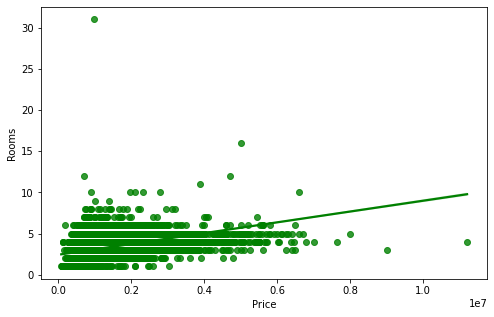

In [21]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Price',y='Rooms',data=dd, color='g')
# plt.savefig("Linear relation(Rooms VS Price).png",dpi=400)

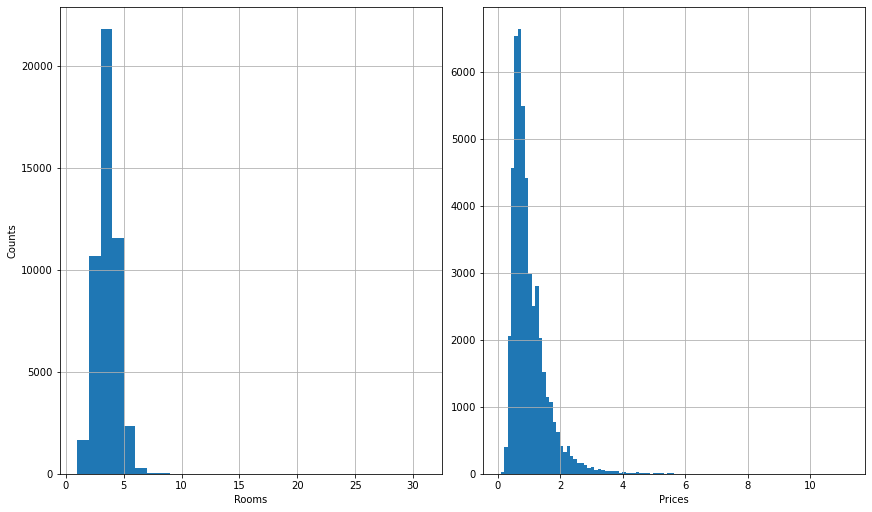

In [22]:
fig, ax =plt.subplots(1,2,constrained_layout=True, figsize=(12, 7))
ax[0].hist(dd['Rooms'], bins=30)
ax[0].set_xlabel('Rooms')
ax[0].set_ylabel('Counts') 
ax[0].grid(True)
ax[1].hist(dd['Price'] / 1e6, bins=100)
ax[1].set_xlabel('Prices')
ax[1].grid(True)

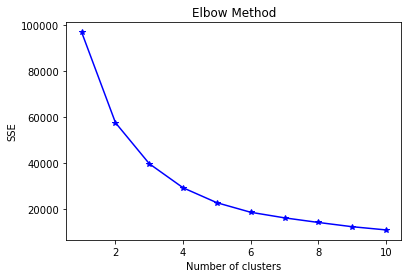

In [23]:
#K-means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
cls=dd[["Rooms","Price"]]
# Convert dataframe into numpy arrays
X =cls.values
# Scaling the data so that all the features/attributes become comparable 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
# Task 3: Build Model: using Elbow Method to find the optimal K
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=20, random_state=1)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse, 'b-*')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
# plt.savefig('K_means1', format='png')
plt.show()

In [24]:
# Build the model using the optimal n_cluster
kmeans = KMeans(n_clusters=4, n_init=20, random_state=1)
# Fit the model and assign each data point to the cluster
y_pred = kmeans.fit_predict(X_scaled) # fit and then predict

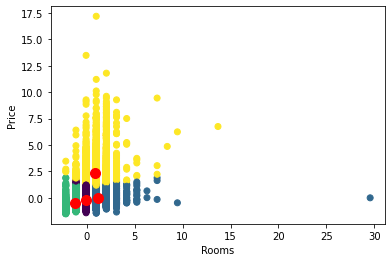

In [25]:
#  Visualise the Clusters
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.savefig('K_means2', format='png')
plt.show()

In [26]:
##Model7 Hierarchical clustering
##not fit for our data

In [26]:
#data preparing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

### Step 2: Select, Train, Evaluate and Fine Tuning the Models
Please shortlist two to five promissing models, provide details on how you fine tuning the model hyperparameters (e.g. using Grid Saerch, Random Search and etc.). Feel free to add in more cells. 

In [27]:
# Model 1
# Enter your code here:

In [28]:
#Linear Regression Model
lm_reg = linear_model.LinearRegression()
lm_reg.fit(X_train, y_train)

LinearRegression()

In [29]:
# print out the model coefficients and intercept
print(lm_reg.coef_)
print(lm_reg.intercept_)

[ 288042.56712231  -79491.18006287  128063.08811904  -14553.00438391
 -309926.34398262]
997099.6198832839


In [30]:
# Model 2
# Enter your code here:

In [64]:
#Support Vector Machine Model
svm_reg = svm.SVR()

param_grid = {"kernel": ['linear', 'rbf'],
              "epsilon":[0.1,1,10,100]
              "gamma" : [0.5,0.4,1,2,3,4,5], 
              'C' : [950,500,1000,1500,3000,5000]}

gs_reg = GridSearchCV(svm_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 5, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_reg.fit(X_train, y_train) 

print(gs_reg.best_estimator_)

SVR(C=1500, gamma=0.4)


In [31]:
#Final Model
svm_reg = svm.SVR(kernel="linear", C=1500,gamma=0.4)
svm_reg.fit(X_train, y_train)

SVR(C=1500, gamma=0.4, kernel='linear')

In [32]:
# Model 3
# Enter your code here:
#MLPRgressor

In [28]:
mlp_reg = neural_network.MLPRegressor()

param_grid = {"activation" : ['relu'],
              "hidden_layer_sizes" : [(10,), (15,), (20,), (30,), (50,), (100,)],
              "max_iter" : [500, 1000, 1500, 2000],
              "solver" : ['adam', 'sgd']}

mlp_reg = GridSearchCV(mlp_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

mlp_reg.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [(10,), (15,), (20,), (30,),
                                                (50,), (100,)],
                         'max_iter': [500, 1000, 1500, 2000],
                         'solver': ['adam', 'sgd']},
             scoring='neg_mean_squared_error')

In [29]:
print(mlp_reg.best_params_)
print(mlp_reg.best_estimator_)

{'activation': 'relu', 'hidden_layer_sizes': (100,), 'max_iter': 2000, 'solver': 'adam'}
MLPRegressor(max_iter=2000)


In [33]:
# Final  mlp model
# mlp_reg = mlp_reg.best_estimator_
mlp_reg = neural_network.MLPRegressor(activation='relu', hidden_layer_sizes=(100,), max_iter=2000, solver='adam')
# Fit the model to the training set
mlp_reg.fit(X_train,y_train)

MLPRegressor(max_iter=2000)

In [34]:
# Model 4 (optional)
# Enter your code here:

In [35]:
#Random Forest Model
rf_reg = ensemble.RandomForestRegression()
param_grid = {"n_estimators" : [10, 20, 30, 100, 1000],
              'criterion' : ['gini', 'entropy'],
              'max_depth' : [3, 9, 10, 27, 35],
              'max_features' : ['auto', 'sqrt', 'log2'] 
             }

gs_reg = GridSearchCV(rf_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
                                                                       
gs_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 9, 10, 27, 35],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 100, 1000]},
             scoring='neg_mean_squared_error')

In [36]:
print(gs_reg.best_score_)
print(gs_reg.best_params_)
print(gs_reg.best_estimator_)

-142530288668.11725
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 30}
RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=30)


In [34]:
#Final Model
# rf_reg = gs_reg.best_estimator_
rf_reg = ensemble.RandomForestClassifier(criterion='gini', max_depth=10, max_features='auto', n_estimators=30)
rf_reg.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=30)

In [35]:
# Model 5 (optional)
# Enter your code here:

In [77]:
import xgboost
xgb_reg = xgboost.XGBRegressor()

param_grid = {
        "n_estimators": [50,100,150,200,300], 
        "eta": [0.05, 0.1, 0,2, 0.3], 
        "max_depth": [3,4,5,6,7], 
        "colsample_bytree": [0.4,0.6,0.8,1], 
        "min_child_weight": [1,2,3,4] 
    }

gs_reg = GridSearchCV(xgb_reg, param_grid, n_jobs=-1, scoring='neg_mean_squared_error', cv=5)
gs_reg.fit(X_train, y_train) 

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.6, 0.8, 1],
                         'eta': [0.05, 0.1, 0, 2, 0.3],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_child_weight': [1, 2, 3, 4],
                         'n_estimators': [50, 100, 150, 200, 300]},
             scoring='neg_mean_squared_error')

In [78]:
print(gs_reg.best_score_)
print(gs_reg.best_params_)
print(gs_reg.best_estimator_)

-93228448801.14752
{'colsample_bytree': 1, 'eta': 0.1, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 300}
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)


In [36]:
#Final Model
import xgboost
# xgb_reg = gs_reg.best_estimator_
xgb_reg = xgboost.XGBRegressor(n_estimators=300, eta=0.1, max_depth=5, colsample_bytree=1, min_child_weight=4)
xgb_reg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

### Step 3: Recommend the Best Model and Explain the Reasons

Enter your answer here:



In [37]:
# Enter your code here (if required):
#1.mean_absolute_error
#2.accuracy
#3.picture

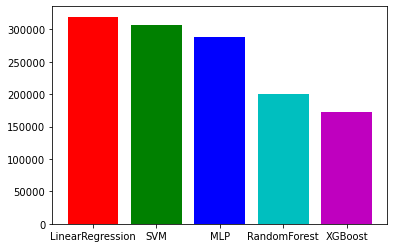

In [38]:
#1.mean_absolute_error

lm_train_mae = mean_absolute_error(lm_reg.predict(X_train), y_train)
svm_train_mae = mean_absolute_error(svm_reg.predict(X_train), y_train)
mlp_train_mae = mean_absolute_error(mlp_reg.predict(X_train), y_train)
rf_train_mae = mean_absolute_error(rf_reg.predict(X_train), y_train)
xgb_train_mae = mean_absolute_error(xgb_reg.predict(X_train), y_train)

lm_test_mae = mean_absolute_error(lm_reg.predict(X_test), y_test)
svm_test_mae = mean_absolute_error(svm_reg.predict(X_test), y_test)
mlp_test_mae = mean_absolute_error(mlp_reg.predict(X_test), y_test)
rf_test_mae = mean_absolute_error(rf_reg.predict(X_test), y_test)
xgb_test_mae = mean_absolute_error(xgb_reg.predict(X_test), y_test)

# Enter your code here (if required):
training_mean_absolute_error = [lm_train_mae, svm_train_mae, mlp_train_mae, rf_train_mae, xgb_train_mae        ]
testing_mean_absolute_error = [ lm_test_mae, svm_test_mae, mlp_test_mae, rf_test_mae, xgb_test_mae                 ]
label = ['LinearRegression', 'SVM', 'MLP', 'RandomForest', 'XGBoost']
acc = pd.DataFrame({'training mean absolute error': training_mean_absolute_error,
                   'testing mean absolute error': testing_mean_absolute_error}, index=label)
acc.plot.bar(rot=0, ylim=[0.5, 1], title ='Train & Test absolute error for different models')

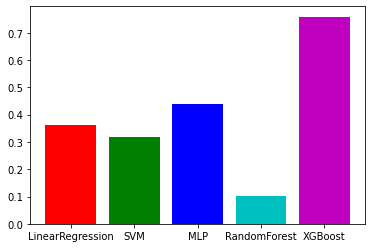

In [40]:
#2.accuracy

lm_acc = lm_reg.score(X_train, y_train)
svm_acc= svm_reg.score(X_train, y_train)
mlp_acc = mlp_reg.score(X_train, y_train)
rf_acc = rf_reg.score(X_train, y_train)
xgb_acc= xgb_reg.score(X_train, y_train)

###test_accuracy
lm_acc = lm_reg.score(X_test, y_test)
svm_acc= svm_reg.score(X_test, y_test)
mlp_acc = mlp_reg.score(X_test, y_test)
rf_acc = rf_reg.score(X_test, y_test)
xgb_acc= xgb_reg.score(X_test, y_test)
 code here (if required):
train_acc_list = [lm_acc, svm_acc, mlp_acc, rf_acc, xgb_acc                  ]
test_acc_list = [ lm_acc, svm_acc, mlp_acc, rf_acc, xgb_acc                 ]
label = ['LinearRegression', 'SVM', 'MLP', 'RandomForest', 'XGBoost']
acc = pd.DataFrame({'train_acc': train_acc_list,
                   'test_acc': test_acc_list}, index=label)
acc.plot.bar(rot=0, ylim=[0.5, 1], title ='Train & Test Accuracy for different models')

In [42]:
print("XGBoost is the best model")
#3.picture

XGBoost is the best model


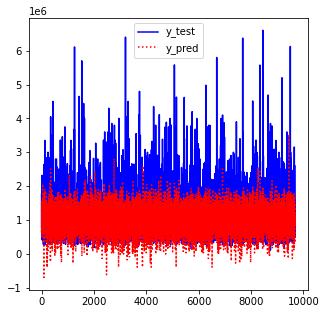

In [58]:
#'LinearRegression', 
lm_y_pred = lm_reg.predict(X_test)
#Visualize
plt.figure(figsize=(5,5))
x = range(0, len(y_test))
plt.plot(x,y_test,'b-',label="y_test")
plt.plot(x,lm_y_pred,'r:',label = "y_pred")
plt.legend()
plt.savefig('LinearRegression.png', format='png')
plt.show()


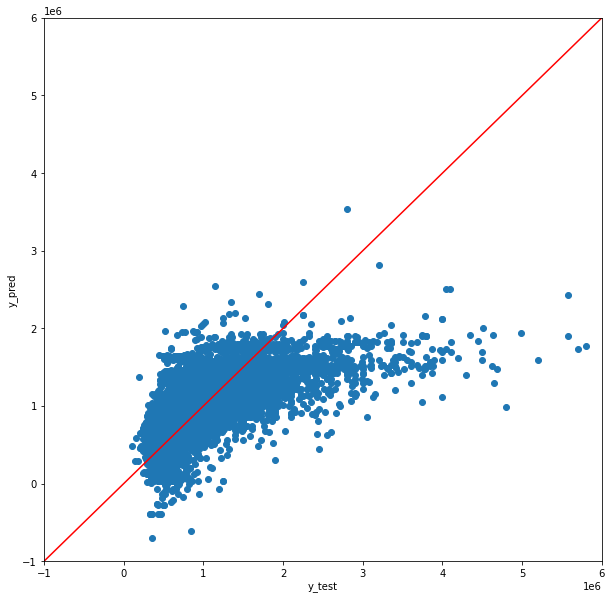

In [59]:
# Visualize y_test & y_pred
plt.figure(figsize=(10,10))
plt.scatter(y_test, lm_y_pred)
plt.plot([-1000000, 6000000], [-1000000, 6000000], 'r-')
plt.xlim(-1000000, 6000000)
plt.ylim(-1000000, 6000000)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.savefig('LinearRegression(linear).png', format='png')

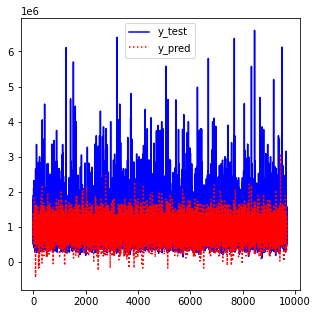

In [60]:
#'SVM',
svm_y_pred = svm_reg.predict(X_test)
#Visualize
plt.figure(figsize=(5,5))
x = range(0, len(y_test))
plt.plot(x,y_test,'b-',label="y_test")
plt.plot(x,svm_y_pred,'r:',label = "y_pred")
plt.legend()
plt.savefig('SVM.png', format='png')
plt.show()


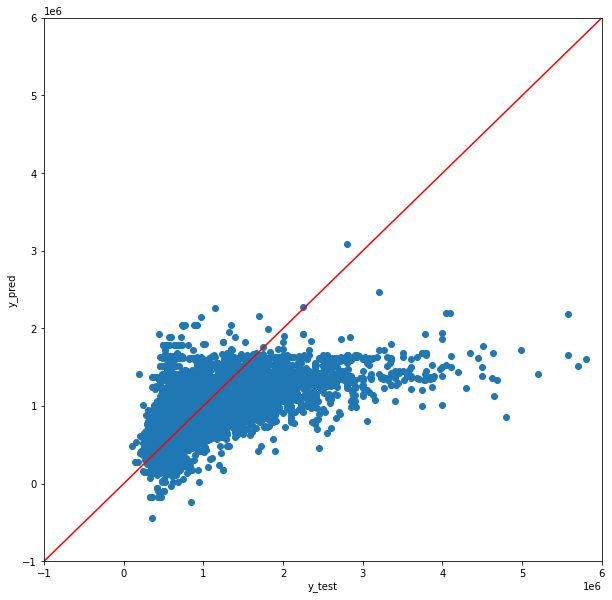

In [61]:
# Visualize y_test & y_pred
plt.figure(figsize=(10,10))
plt.scatter(y_test, svm_y_pred)
plt.plot([-1000000, 6000000], [-1000000, 6000000], 'r-')
plt.xlim(-1000000, 6000000)
plt.ylim(-1000000, 6000000)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.savefig('SVM(linear).png', format='png')

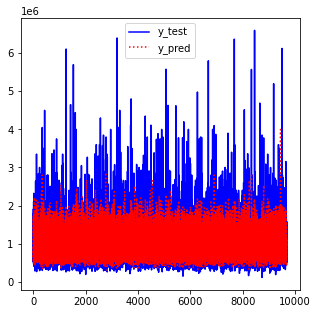

In [62]:
#'MLP', 
mlp_y_pred = mlp_reg.predict(X_test)
#Visualize
plt.figure(figsize=(5,5))
x = range(0, len(y_test))
plt.plot(x,y_test,'b-',label="y_test")
plt.plot(x,mlp_y_pred,'r:',label = "y_pred")
plt.legend()
plt.savefig('MLP.png', format='png')
plt.show()


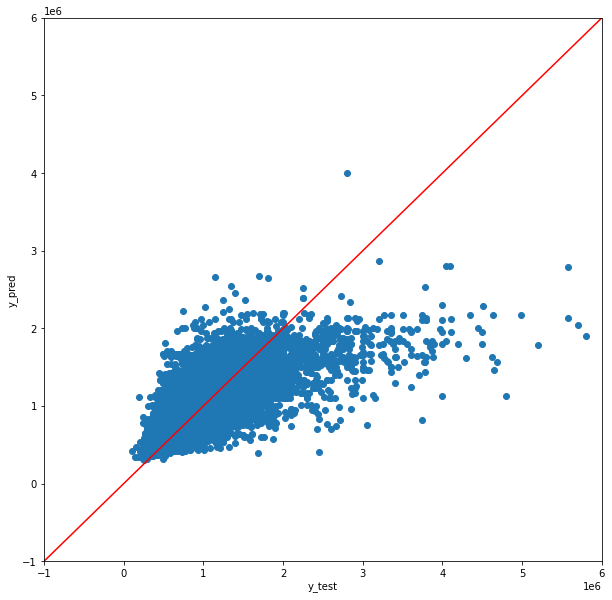

In [63]:
# Visualize y_test & y_pred
plt.figure(figsize=(10,10))
plt.scatter(y_test, mlp_y_pred)
plt.plot([-1000000, 6000000], [-1000000, 6000000], 'r-')
plt.xlim(-1000000, 6000000)
plt.ylim(-1000000, 6000000)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.savefig('MLP(linear).png', format='png')

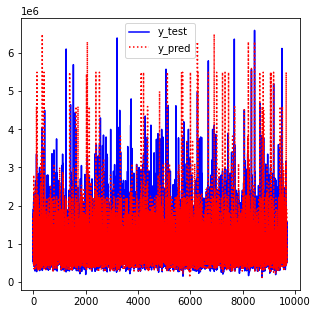

In [64]:
#'RandomForest', 
rf_y_pred = rf_reg.predict(X_test)
#Visualize
plt.figure(figsize=(5,5))
x = range(0, len(y_test))
plt.plot(x,y_test,'b-',label="y_test")
plt.plot(x,rf_y_pred,'r:',label = "y_pred")
plt.legend()
plt.savefig('RandomForest.png', format='png')
plt.show()


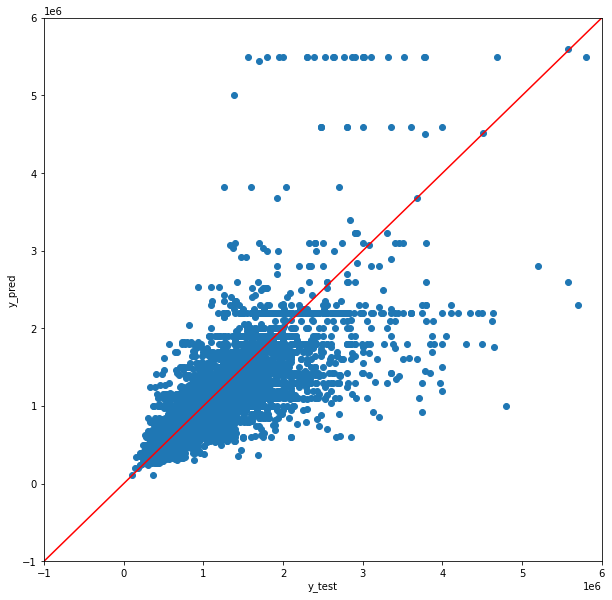

In [65]:
# Visualize y_test & y_pred
plt.figure(figsize=(10,10))
plt.scatter(y_test, rf_y_pred)
plt.plot([-1000000, 6000000], [-1000000, 6000000], 'r-')
plt.xlim(-1000000, 6000000)
plt.ylim(-1000000, 6000000)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.savefig('RandomForest(linear).png', format='png')

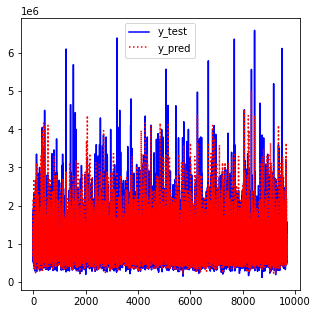

In [66]:
#'XGBoost'
xgb_y_pred = xgb_reg.predict(X_test)
#Visualize
plt.figure(figsize=(5,5))
x = range(0, len(y_test))
plt.plot(x,y_test,'b-',label="y_test")
plt.plot(x,xgb_y_pred,'r:',label = "y_pred")
plt.legend()
plt.savefig('XGBoost.png', format='png')
plt.show()


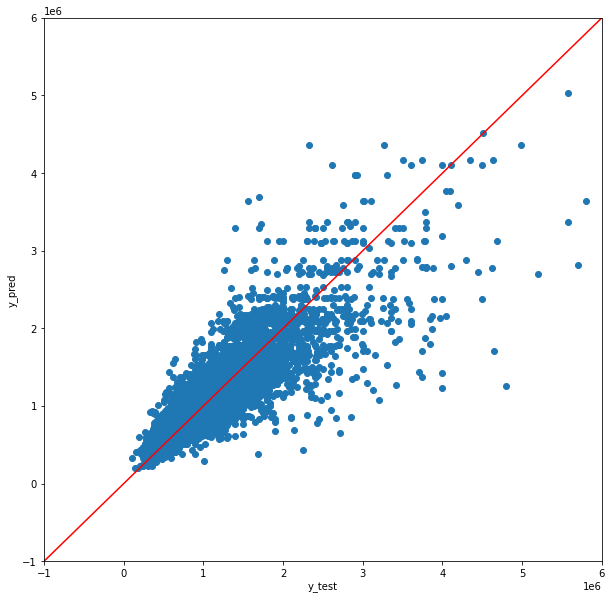

In [67]:
# Visualize y_test & y_pred
plt.figure(figsize=(10,10))
plt.scatter(y_test, xgb_y_pred)
plt.plot([-1000000, 6000000], [-1000000, 6000000], 'r-')
plt.xlim(-1000000, 6000000)
plt.ylim(-1000000, 6000000)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.savefig('XGBoost(linear).png', format='png')

### Step 4: Use the best model to make prediction
Make prediction on the test data and provide the error analysis on the results (e.g. 95% confidence interval, visualization tools and etc.)

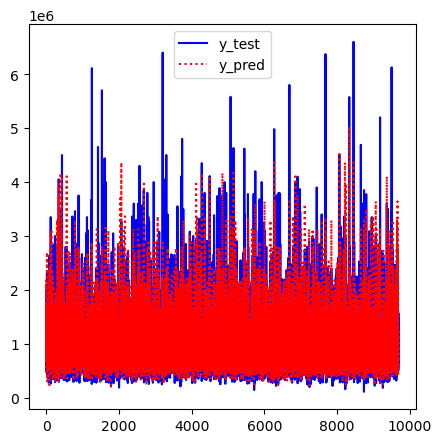

In [64]:
#'XGBoost'
xgb_y_pred = xgb_reg.predict(X_test)
#Visualize
plt.figure(figsize=(5,5))
x = range(0, len(y_test))
plt.plot(x,y_test,'b-',label="y_test")
plt.plot(x,xgb_y_pred,'r:',label = "y_pred")
plt.legend()
plt.show()

In [88]:
#Price description
#normal distrbution?
from scipy import stats
#p>0.5
u = dd['Price'].mean()  # 计算均值
std = dd['Price'].std()  # 计算标准差
print(stats.kstest(dd['Price'], 'norm', (u, std)))

KstestResult(statistic=0.1421658683462218, pvalue=0.0)


In [89]:
print("Our data do not follow a normal distribution")
print(stats.kstest(dd['Price'], 't', (u, std)))

Our data do not follow a normal distribution
KstestResult(statistic=0.7843412549294903, pvalue=0.0)


In [95]:
print("Our data do not follow a t distribution")
#CI
z=1.96#95%
a = u - z * std
b = u + z * std
print("Initial price 's CI is ["+str(a)+", "+str(b)+"]")

Our data do not follow a t distribution
Initial price 's CI is [-165359.63982481894, 2161156.122801302]


In [101]:
# pred description
u2 = xgb_y_pred.mean()  # 计算均值
std2 = xgb_y_pred.std()  # 计算标准差
print(stats.kstest(new, 'norm', (u2, std2)))
print("Our data do not follow a normal distribution")
print(stats.kstest(new, 't', (u2, std2)))
print("Our data do not follow a t distribution")
#pred's CI
z=1.96#95%
a = u2 - z * std2
b = u2 + z * std2
print("y_pred 's CI is ["+str(a)+", "+str(b)+"]")

KstestResult(statistic=0.8358796492384483, pvalue=0.0)
Our data do not follow a normal distribution
KstestResult(statistic=0.9638691029214411, pvalue=0.0)
Our data do not follow a t distribution
y_pred 's CI is [-9906.900000000023, 2011205.9]


In [99]:
# error description
new =y_test -xgb_y_pred
u1 = new.mean()  # 计算均值
print(std1)
std1 = new.std()  # 计算标准差
print(stats.kstest(new, 'norm', (u1, std1)))
print("Our data do not follow a normal distribution")
print(stats.kstest(new, 't', (u1, std1)))
print("Our data do not follow a t distribution")
#Error's CI
z=1.96#95%
a = u1 - z * std1
b = u1 + z * std1
print("Error 's CI is ["+str(a)+", "+str(b)+"]")

293044.9434372207
KstestResult(statistic=0.14283951774388526, pvalue=6.369116774530027e-173)
Our data do not follow a normal distribution
KstestResult(statistic=0.9192732528130484, pvalue=0.0)
Our data do not follow a t distribution
Error 's CI is [-573925.0463395823, 574811.1319343228]


### Step 5: Save the Best Model for Future Use

In [103]:
# Enter your code here:

# Save the best model
import joblib
joblib.dump(xgb_reg,"best_reg.pk")

['best_reg.pk']

 
 
## <center>End of Assignment<center>
---